In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = './data/250711_dataset_analysis.xlsx'

df = pd.read_excel(file_path, sheet_name='ID_class_figure')

In [3]:
df.head()

,Label (RT_m/z),Putative metabolites,Class,Note,HMDB,Mode,FDR,RSD,FC
0,1.668_257.04443,Purpurin,Anthracenes,NaN,HMDB0256928,Pos,0.0008,11,0.77
1,5.164_137.02446,Salicylate,Benzene and substituted derivatives,NaN,HMDB0001895,Neg,0.0125,10,1.69
2,5.507_184.00542,Saccharin,Benzothiazoles,NaN,HMDB0029723,Pos,>0.0001,25,2.11
3,0.905_188.1757,Acetylspermidine,Carboximidic acids and derivatives,NaN,HMDB0002189,Pos,0.0497,6,3.18
4,5.333_222.07729,Acetyltyrosine,Carboxylic acids and derivatives,NaN,HMDB0244966,Neg,0.0232,10,1.46


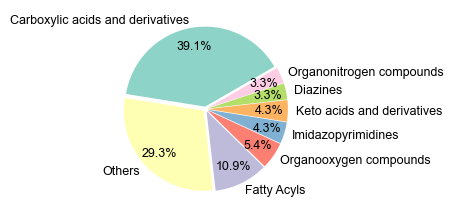

In [4]:
class_counts_raw = df['Class'].value_counts()
rare_classes = class_counts_raw[class_counts_raw <= 2].index
df['Class_grouped'] = df['Class'].apply(lambda x: 'Others' if x in rare_classes else x)

class_counts = df['Class_grouped'].value_counts()
labels = class_counts.index
sizes = class_counts.values
explode = [0.03] * len(sizes)
colors = sns.color_palette("Set3", n_colors=len(labels))

plt.figure(figsize=(4.5, 2.3))
wedges, texts = plt.pie(
    sizes,
    labels=labels,
    startangle=30,
    explode=explode,
    colors=colors,
    wedgeprops={'linewidth': 0},
    textprops={'fontsize': 9}
)

total = sum(sizes)
for i, (wedge, size) in enumerate(zip(wedges, sizes)):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle)) * 0.8
    y = np.sin(np.deg2rad(angle)) * 0.8
    percentage = f'{(size / total) * 100:.1f}%'
    plt.text(x, y, percentage, ha='center', va='center', fontsize=9)

plt.tight_layout()
# plt.savefig('pie_rev.tif',dpi=600)

plt.show()
